In [74]:
cd /Users/jibanmac/Documents/GitHub/matter_multi_fidelity_emu

/Users/jibanmac/Documents/GitHub/matter_multi_fidelity_emu


In [1]:
import numpy as np
import h5py
import json
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams.update(
    {"font.size": 16, "axes.labelsize": 24, "axes.titlesize": 18, "text.usetex": True,
    "xtick.major.width": 1.5, "xtick.minor.width": 1.2, "ytick.major.width": 1.5, "ytick.minor.width": 1.2,
    "legend.fontsize": 18}
)

# colors to use
c_flatirons = '#8B2131'
c_sunshine = '#CA9500'
c_skyline = '#1D428A'
c_midnight = '#0E2240'

colors = [c_flatirons, c_sunshine, c_skyline, c_midnight]

In [7]:
import os

In [4]:
from matter_multi_fidelity_emu.plottings.validation_loader import ValidationLoader

# Hydro-Corrected Model (DM-only → Full-physics)

In [75]:
cd /Users/jibanmac/Documents/GitHub/matter_multi_fidelity_emu

/Users/jibanmac/Documents/GitHub/matter_multi_fidelity_emu


In [76]:

class PreloadedVloaders:
    """
    Prepare validation loaders
    """

    def __init__(self, img_dir: str = "output/"):
        old_dir = os.getcwd()
        os.chdir(img_dir)

        ####################### Vary LF #######################
        # AR1: z = 0
        res_l = 128
        res_h = 128
        box_l = 256
        box_h = 256
        z = 0
        num_lf = [50, 50, 50, 50, 50]
        num_hf = [3, 4, 5, 6, 50]
        self.ar1_L50 = ValidationLoader(
            [
                 "{}_dmonly_{}_fullphysics_hydro_opt/AR1".format(n_lf, n_hf) for n_lf, n_hf in zip(num_lf, num_hf)
            ],
            num_lowres_list=num_lf,
            num_highres=num_hf,
        )
        self.ar1_L50.res_l = res_l
        self.ar1_L50.res_h = res_h
        self.ar1_L50.box_l = box_l
        self.ar1_L50.box_h = box_h
        self.ar1_L50.z     = z 
        self.ar1_L50.num_lf = num_lf
        self.ar1_L50.num_hf = num_hf
        # NARGP
        self.nargp_L50 = ValidationLoader(
            [
                 "{}_dmonly_{}_fullphysics_hydro_opt/NARGP".format(n_lf, n_hf) for n_lf, n_hf in zip(num_lf, num_hf)
            ],
            num_lowres_list=num_lf,
            num_highres=num_hf,
        )
        self.nargp_L50.res_l = res_l
        self.nargp_L50.res_h = res_h
        self.nargp_L50.box_l = box_l
        self.nargp_L50.box_h = box_h
        self.nargp_L50.z     = z 
        self.nargp_L50.num_lf = num_lf
        self.nargp_L50.num_hf = num_hf

        

In [77]:
vloaders = PreloadedVloaders()

/Users/jibanmac/Documents/GitHub/matter_multi_fidelity_emu/matter_multi_fidelity_emu/plottings/validation_loader.py:149: RuntimeWarning: overflow encountered in power
  return 10.0 ** x


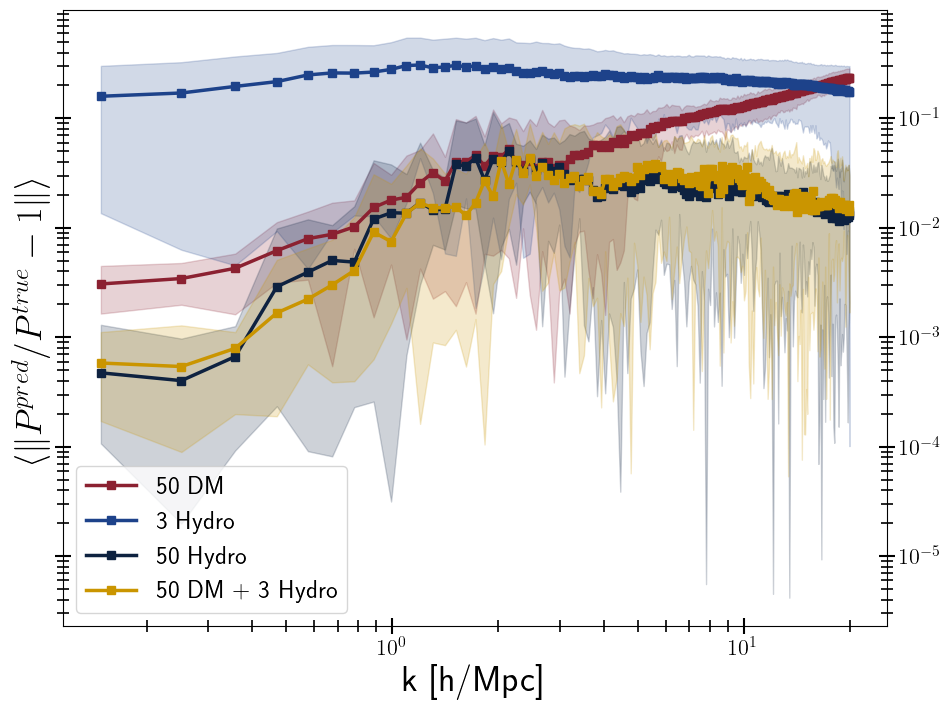

In [82]:
kk = 10**vloaders.ar1_L50.kf[0]

k_max = 20

ind = kk < k_max


# ith emulator: [3, 4, 5, 6, 50]
i = 0
factor = 3

# emulator errors
absmeanLF = vloaders.ar1_L50.relative_errors[i, :, :].mean(axis=0)
absstdmin = vloaders.ar1_L50.relative_errors[i, :, :].min(axis=0)
absstdmax = vloaders.ar1_L50.relative_errors[i, :, :].max(axis=0)

# Hydro only
absmean_hydro    = vloaders.ar1_L50.relative_errors_hf[i, :, :].mean(axis=0)
absstdmin_hydro  = vloaders.ar1_L50.relative_errors_hf[i, :, :].min(axis=0)
absstdmax_hydro  = vloaders.ar1_L50.relative_errors_hf[i, :, :].max(axis=0)

# DM only
absmean_dm     = vloaders.ar1_L50.relative_errors_lf[i, :, :].mean(axis=0)
absstdmin_dm   = vloaders.ar1_L50.relative_errors_lf[i, :, :].min(axis=0)
absstdmax_dm   = vloaders.ar1_L50.relative_errors_lf[i, :, :].max(axis=0)

# perfect hydro: using 50 hydro
absmean_perfect_hydro   = vloaders.ar1_L50.relative_errors_hf[-1, :, :].mean(axis=0)
absstdmin_perfect_hydro = vloaders.ar1_L50.relative_errors_hf[-1, :, :].min(axis=0)
absstdmax_perfect_hydro = vloaders.ar1_L50.relative_errors_hf[-1, :, :].max(axis=0)

# --------------------------------------


fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1)

def plot_error(ax, kk, absmeanLF, absmin, absmax, color, label):
    # 50-3 emulator
    ax.semilogx(
        kk,
        absmeanLF,
        's-',
        lw=2.5,
        color=color,
        label=label
    )
    # plot variance instead of std
    ax.fill_between(
        kk,
        (absmin),
        (absmax),
        alpha=0.2,
        color=color,
    )

plot_error(ax, kk[ind], absmean_dm[ind], absstdmin_dm[ind], absstdmax_dm[ind], color=colors[0], label="50 DM")
plot_error(ax, kk[ind], absmean_hydro[ind], absstdmin_hydro[ind], absstdmax_hydro[ind], color=colors[2], label="3 Hydro")
plot_error(ax, kk[ind], absmean_perfect_hydro[ind], absstdmin_perfect_hydro[ind], absstdmax_perfect_hydro[ind], color=colors[3], label="50 Hydro")
plot_error(ax, kk[ind], absmeanLF[ind], absstdmin[ind], absstdmax[ind], color=colors[1], label="50 DM + 3 Hydro")




# Martin style
ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)
ax.set_yscale('log')
# ax.set_ylim([1e-4, 3e-1])
# ax.set_xlim([kf_test.min()* 0.8, kf_test.max() * 1.1])

ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8)

ax.legend()
# ax.set_title("z = 0 - 3")

fig.savefig(
    "../../../Latex/postdoc_app_2022/images/ar1_mf_hydro.pdf",
    bbox_inches='tight',
    pad_inches=0.075
)
plt.show()

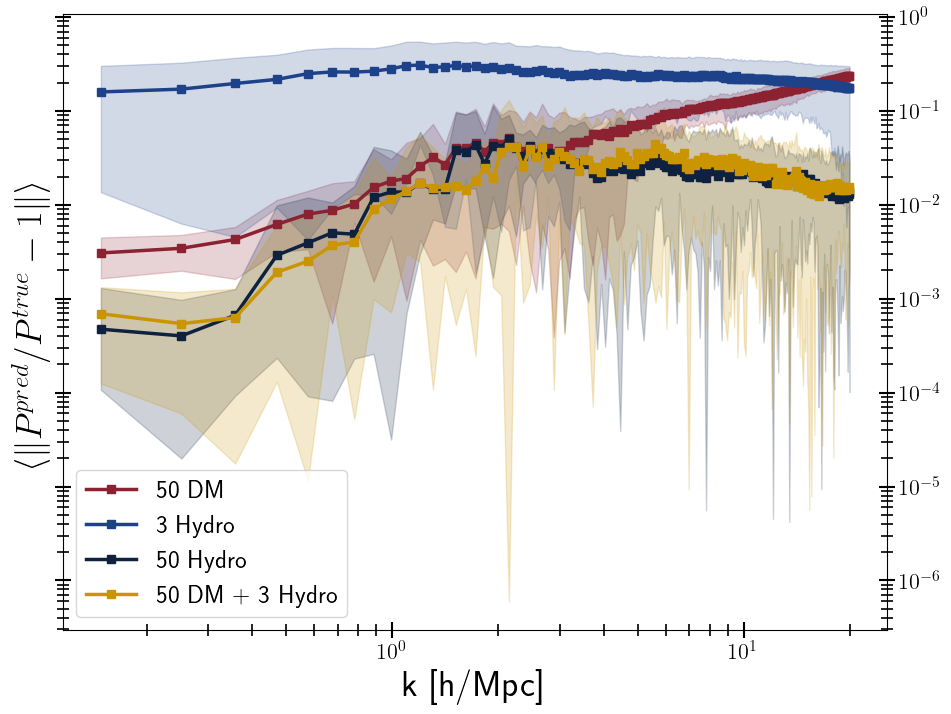

In [79]:
kk = 10**vloaders.nargp_L50.kf[0]

k_max = 20

ind = kk < k_max


# ith emulator: [3, 4, 5, 6, 50]
i = 0
factor = 3

# emulator errors
absmeanLF = vloaders.nargp_L50.relative_errors[i, :, :].mean(axis=0)
absstdmin = vloaders.nargp_L50.relative_errors[i, :, :].min(axis=0)
absstdmax = vloaders.nargp_L50.relative_errors[i, :, :].max(axis=0)

# Hydro only
absmean_hydro    = vloaders.nargp_L50.relative_errors_hf[i, :, :].mean(axis=0)
absstdmin_hydro  = vloaders.nargp_L50.relative_errors_hf[i, :, :].min(axis=0)
absstdmax_hydro  = vloaders.nargp_L50.relative_errors_hf[i, :, :].max(axis=0)

# DM only
absmean_dm     = vloaders.nargp_L50.relative_errors_lf[i, :, :].mean(axis=0)
absstdmin_dm   = vloaders.nargp_L50.relative_errors_lf[i, :, :].min(axis=0)
absstdmax_dm   = vloaders.nargp_L50.relative_errors_lf[i, :, :].max(axis=0)

# perfect hydro: using 50 hydro
absmean_perfect_hydro   = vloaders.nargp_L50.relative_errors_hf[-1, :, :].mean(axis=0)
absstdmin_perfect_hydro = vloaders.nargp_L50.relative_errors_hf[-1, :, :].min(axis=0)
absstdmax_perfect_hydro = vloaders.nargp_L50.relative_errors_hf[-1, :, :].max(axis=0)

# --------------------------------------


fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1)

def plot_error(ax, kk, absmeanLF, absmin, absmax, color, label):
    # 50-3 emulator
    ax.semilogx(
        kk,
        absmeanLF,
        's-',
        lw=2.5,
        color=color,
        label=label
    )
    # plot variance instead of std
    ax.fill_between(
        kk,
        (absmin),
        (absmax),
        alpha=0.2,
        color=color,
    )

plot_error(ax, kk[ind], absmean_dm[ind], absstdmin_dm[ind], absstdmax_dm[ind], color=colors[0], label="50 DM")
plot_error(ax, kk[ind], absmean_hydro[ind], absstdmin_hydro[ind], absstdmax_hydro[ind], color=colors[2], label="3 Hydro")
plot_error(ax, kk[ind], absmean_perfect_hydro[ind], absstdmin_perfect_hydro[ind], absstdmax_perfect_hydro[ind], color=colors[3], label="50 Hydro")
plot_error(ax, kk[ind], absmeanLF[ind], absstdmin[ind], absstdmax[ind], color=colors[1], label="50 DM + 3 Hydro")




# Martin style
ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)
ax.set_yscale('log')
# ax.set_ylim([1e-4, 3e-1])
# ax.set_xlim([kf_test.min()* 0.8, kf_test.max() * 1.1])

ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8)

ax.legend()
# ax.set_title("z = 0 - 3")


